In [1]:
import lymph
import pandas as pd
import numpy as np

First we need to set up the lymph model and load the data

In [59]:
graph_dict = {
    ('tumor', 'T')  : ['II', 'III', 'IV'], 
    ('lnl'  , 'II') : ['III'], 
    ('lnl'  , 'III'): ['IV'], 
    ('lnl'  , 'IV') : []
}
dataset = pd.read_csv('usz_reduced_cohort.csv', header = [0,1,2])
dataset_roman = pd.read_csv('reduced.csv', header = [0,1,2])
dataset_usz = pd.read_csv('usz.csv', header = [0,1,2])
dataset_original_reduced = pd.read_csv('usz_reduced.csv', header = [0,1,2])

model = lymph.models.Midline.binary(graph_dict = graph_dict,use_midext_evo = False)

In [86]:
dataset_usz_small = dataset_usz.loc[:194]
dataset_usz_small

patient                                                        \
          #                                                         
         id                 institution     sex age diagnose_date   
0         1  University Hospital Zurich    male  59    2017-08-30   
1         2  University Hospital Zurich  female  75    2017-10-25   
2         3  University Hospital Zurich    male  87    2018-04-03   
3         4  University Hospital Zurich    male  87    2018-04-16   
4         5  University Hospital Zurich  female  70    2018-05-25   
..      ...                         ...     ...  ..           ...   
190     191  University Hospital Zurich    male  59    2016-07-08   
191     192  University Hospital Zurich  female  69    2016-07-28   
192     193  University Hospital Zurich    male  71    2016-08-06   
193     194  University Hospital Zurich    male  75    2016-10-28   
194     195  University Hospital Zurich    male  50    2016-08-02   

                                                                         ...  \
                                                                         ...   
    alcohol_abuse nicotine_abuse hpv_status neck_dissection tnm_edition  ...   
0            True           True       True           False           8  ...   
1           False          False       True           False           8  ...   
2           False           True       True           False           7  ...   
3            True           True      False           False           8  ...   
4            True           True       True           False           7  ...   
..            ...            ...        ...             ...         ...  ...   
190         False          False       True           False           7  ...   
191          True           True       True           False           7  ...   
192          True          False       True           False           7  ...   
193          True           True       True           False           7  ...   
194         False           True       True           False           7  ...   

    max_llh                                                      
       ipsi                                       contra         
          V  VI    VII VIII  IX   X     Va     Vb     Va     Vb  
0     False NaN  False  NaN NaN NaN  False  False  False  False  
1     False NaN  False  NaN NaN NaN  False  False  False  False  
2     False NaN   True  NaN NaN NaN  False  False  False  False  
3     False NaN   True  NaN NaN NaN  False  False  False  False  
4     False NaN   True  NaN NaN NaN  False  False  False  False  
..      ...  ..    ...  ...  ..  ..    ...    ...    ...    ...  
190   False NaN  False  NaN NaN NaN  False  False  False  False  
191   False NaN   True  NaN NaN NaN  False  False  False  False  
192   False NaN  False  NaN NaN NaN  False  False  False  False  
193   False NaN  False  NaN NaN NaN  False  False  False  False  
194   False NaN  False  NaN NaN NaN  False  False  False  False  

[195 rows x 251 columns]

In [80]:
dataset_original_reduced['tumor','1','t_stage']

0      2
1      2
2      3
3      2
4      4
      ..
190    4
191    4
192    4
193    4
194    2
Name: (tumor, 1, t_stage), Length: 195, dtype: int64

In [83]:
matching_ids = dataset_original_reduced['patient', '#', 'id']
filtered_columns = dataset_usz.loc[dataset_usz['patient', '#', 'id'].isin(matching_ids)]
list(filtered_columns['tumor','1','t_stage']) == list(dataset_original_reduced['tumor','1','t_stage'])

True

In [73]:
model.noext.ipsi.patient_data['_model']

pCT               max_llh                  MRI                  PET  \
        II    III     IV      II    III     IV     II    III     IV     II   
0     True  False  False    True  False  False  False   True  False    NaN   
1     True  False  False    True  False  False    NaN    NaN    NaN   True   
2    False  False  False   False  False  False   True  False  False  False   
3    False  False  False   False  False  False  False  False  False    NaN   
4     True   True   True    True   True   True    NaN    NaN    NaN   True   
..     ...    ...    ...     ...    ...    ...    ...    ...    ...    ...   
111   True  False  False    True  False  False    NaN    NaN    NaN   True   
112   True   True  False    True   True   True    NaN    NaN    NaN   True   
113   True   True  False    True   True  False    NaN    NaN    NaN   True   
114   True   True  False    True   True  False   True   True  False   True   
115   True   True  False    True   True  False    NaN    NaN    NaN   True   

     ...    FNA               CT           pathology               #  
     ...     II    III   IV   II  III   IV        II III  IV t_stage  
0    ...   True    NaN  NaN  NaN  NaN  NaN       NaN NaN NaN   early  
1    ...   True    NaN  NaN  NaN  NaN  NaN       NaN NaN NaN   early  
2    ...  False    NaN  NaN  NaN  NaN  NaN       NaN NaN NaN    late  
3    ...    NaN    NaN  NaN  NaN  NaN  NaN       NaN NaN NaN   early  
4    ...    NaN    NaN  NaN  NaN  NaN  NaN       NaN NaN NaN    late  
..   ...    ...    ...  ...  ...  ...  ...       ...  ..  ..     ...  
111  ...  False  False  NaN  NaN  NaN  NaN       NaN NaN NaN    late  
112  ...   True    NaN  NaN  NaN  NaN  NaN       NaN NaN NaN    late  
113  ...   True    NaN  NaN  NaN  NaN  NaN       NaN NaN NaN   early  
114  ...    NaN    NaN  NaN  NaN  NaN  NaN       NaN NaN NaN    late  
115  ...   True    NaN  NaN  NaN  NaN  NaN       NaN NaN NaN   early  

[116 rows x 22 columns]

In [ ]:
dataset_roman.loc[(dataset_roman['patient','#','institution'] == 'University Hospital Zurich') & (dataset_roman)]

patient                                                        \
          #                                                         
         id                 institution     sex age diagnose_date   
0         1  University Hospital Zurich    male  59    2017-08-30   
1         2  University Hospital Zurich  female  75    2017-10-25   
2         3  University Hospital Zurich    male  87    2018-04-03   
3         4  University Hospital Zurich    male  87    2018-04-16   
4         5  University Hospital Zurich  female  70    2018-05-25   
..      ...                         ...     ...  ..           ...   
282     283  University Hospital Zurich    male  49    2013-07-28   
283     284  University Hospital Zurich    male  67    2013-09-19   
284     285  University Hospital Zurich    male  44    2013-06-29   
285     286  University Hospital Zurich    male  67    2013-07-04   
286     287  University Hospital Zurich    male  76    2013-07-02   

                                                                         ...  \
                                                                         ...   
    alcohol_abuse nicotine_abuse hpv_status neck_dissection tnm_edition  ...   
0            True           True       True           False           8  ...   
1           False          False       True           False           8  ...   
2           False           True       True           False           7  ...   
3            True           True      False           False           8  ...   
4            True           True       True           False           7  ...   
..            ...            ...        ...             ...         ...  ...   
282         False           True      False           False           7  ...   
283          True           True       True           False           7  ...   
284          True           True      False           False           7  ...   
285          True           True      False           False           7  ...   
286         False           True       True           False           7  ...   

    max_llh                                                      
       ipsi                                       contra         
          V  VI    VII VIII  IX   X     Va     Vb     Va     Vb  
0     False NaN  False  NaN NaN NaN  False  False  False  False  
1     False NaN  False  NaN NaN NaN  False  False  False  False  
2     False NaN   True  NaN NaN NaN  False  False  False  False  
3     False NaN   True  NaN NaN NaN  False  False  False  False  
4     False NaN   True  NaN NaN NaN  False  False  False  False  
..      ...  ..    ...  ...  ..  ..    ...    ...    ...    ...  
282   False NaN  False  NaN NaN NaN  False  False  False  False  
283   False NaN  False  NaN NaN NaN  False  False  False  False  
284    True NaN  False  NaN NaN NaN    NaN    NaN  False  False  
285   False NaN  False  NaN NaN NaN  False  False  False  False  
286   False NaN  False  NaN NaN NaN  False  False  False  False  

[287 rows x 251 columns]

as you can see, the model gets started with the graph. 
The graph includes all the LNLs and how they are connected to each other.
With the graph, the lymph package sets up all the needed parameters for the model - very convenient.

Let's load some data

In [87]:
model.load_patient_data(dataset_usz_small)
# we need to define the diagnostic modality
model.set_modality("max_llh", spec=1, sens=1)


/home/yoel/Documents/Loris_midline/.venv/lib/python3.10/site-packages/lymph/models/unilateral.py:529: DataWarning: ipsilateral involvement data not found. Skipping modality dataset.
  warnings.warn(
/home/yoel/Documents/Loris_midline/.venv/lib/python3.10/site-packages/lymph/models/unilateral.py:529: DataWarning: contralateral involvement data not found. Skipping modality dataset.
  warnings.warn(
/home/yoel/Documents/Loris_midline/.venv/lib/python3.10/site-packages/lymph/models/unilateral.py:529: DataWarning: ipsilateral involvement data not found. Skipping modality dataset.
  warnings.warn(
/home/yoel/Documents/Loris_midline/.venv/lib/python3.10/site-packages/lymph/models/unilateral.py:529: DataWarning: contralateral involvement data not found. Skipping modality dataset.
  warnings.warn(


What is left is to define the time prior distribution(s)

In [88]:
import scipy as sp
import numpy as np

rng = np.random.default_rng(42)

max_time = model.max_time
time_steps = np.arange(max_time+1)
p = 0.3

early_prior = sp.stats.binom.pmf(time_steps, max_time, p)
model.set_distribution("early", early_prior)
def late_binomial(support: np.ndarray, p: float = 0.5) -> np.ndarray:
    """Parametrized binomial distribution."""
    return sp.stats.binom.pmf(support, n=support[-1], p=p)

model.set_distribution("late", late_binomial)
model.get_params()

{'ipsi_TtoII_spread': 0.5,
 'ipsi_TtoIII_spread': 0.5,
 'ipsi_TtoIV_spread': 0.5,
 'contra_TtoII_spread': 0.5,
 'contra_TtoIII_spread': 0.5,
 'contra_TtoIV_spread': 0.5,
 'mixing': 0.5,
 'IItoIII_spread': 0.5,
 'IIItoIV_spread': 0.5,
 'late_p': 0.5,
 'midext_prob': 0.5}

In [89]:
def llh(params):
    test = True
    for key in params.keys():
        if params[key] > 1 or params[key] < 0:
            test = False
    if not test:
        return -np.inf
    else:
        model.set_params(**params)
        return model.likelihood()

now we also have a parameter for the time prior distribution!

we can finally see how well the model fits the data.

In [90]:
list(model.get_params().keys())

['ipsi_TtoII_spread',
 'ipsi_TtoIII_spread',
 'ipsi_TtoIV_spread',
 'contra_TtoII_spread',
 'contra_TtoIII_spread',
 'contra_TtoIV_spread',
 'mixing',
 'IItoIII_spread',
 'IIItoIV_spread',
 'late_p',
 'midext_prob']

## sample some stuff

In [91]:
import emcee

nwalkers, ndim = 100, len(model.get_params())-1
nsteps = 10000
initial = np.random.uniform(size=(nwalkers, ndim))

In [92]:
sampler = emcee.EnsembleSampler(
    nwalkers=nwalkers,
    ndim=ndim,
    log_prob_fn=llh,
    parameter_names=list(model.get_params().keys())[:-1],
)

In [39]:
from multiprocessing import cpu_count

ncpu = cpu_count()
print("{0} CPUs".format(ncpu))

20 CPUs


In [164]:
model.set_params(midext_prob = 0.2)

()

In [ ]:
from multiprocessing import Pool

with Pool() as pool:
    sampler = emcee.EnsembleSampler(
        nwalkers=nwalkers,
        ndim=ndim,
        log_prob_fn=llh,
        pool=pool,
        parameter_names=list(model.get_params().keys())[:-1],
    )
    sampler.run_mcmc(initial_state=initial, nsteps=nsteps, progress=True)


  1%|          | 80/10000 [00:07<15:16, 10.82it/s]

In [67]:
# model.get_params()
model.likelihood()

np.float64(-1367.6634003927102)

In [68]:
model.get_params()

{'ipsi_TtoII_spread': 0.5,
 'ipsi_TtoIII_spread': 0.5,
 'ipsi_TtoIV_spread': 0.5,
 'contra_TtoII_spread': 0.5,
 'contra_TtoIII_spread': 0.5,
 'contra_TtoIV_spread': 0.5,
 'mixing': 0.5,
 'IItoIII_spread': 0.5,
 'IIItoIV_spread': 0.5,
 'late_p': 0.5,
 'midext_prob': 0.5}

In [11]:
roman_params = {'ipsi_TtoII_spread': 0.3489,
 'ipsi_TtoIII_spread': 0.0545,
 'ipsi_TtoIV_spread': 0.0094,
 'contra_TtoII_spread': 0.0246,
 'contra_TtoIII_spread': 0.0014,
 'contra_TtoIV_spread': 0.0019,
 'mixing': 0.3387,
 'IItoIII_spread': 0.1423,
 'IIItoIV_spread': 0.1586,
 'late_p': 0.4498,
 'midext_prob': 0.0816,}

In [156]:
model.set_params(midext_prob = 0.5)

()

In [69]:
tau = 2500
burnin = int(2 * np.max(tau))
thin = 10
samples_org_reduced = sampler.get_chain(discard=burnin, flat=True, thin=thin)

In [22]:
samples2.mean(axis = 0)

array([0.51512353, 0.07466129, 0.00986586, 0.04889585, 0.00416648,
       0.00405041, 0.13083709, 0.28844674, 0.17439124, 0.28881249])

In [163]:
param_values = np.array([0.39547156, 0.06225555, 0.01050086, 0.0278196 , 0.00168537,
                      0.00220051, 0.24572783, 0.15405064, 0.18291772, 0.36139936])

params_to_set = {key: value for key, value in zip(list(model.get_params().keys()), param_values)}
model.set_params(**params_to_set)
model.likelihood()

np.float64(-2172.670835374904)

In [23]:
model.get_params()

{'ipsi_TtoII_spread': 0.3489,
 'ipsi_TtoIII_spread': 0.0545,
 'ipsi_TtoIV_spread': 0.0094,
 'contra_TtoII_spread': 0.0246,
 'contra_TtoIII_spread': 0.0014,
 'contra_TtoIV_spread': 0.0019,
 'mixing': 0.3387,
 'IItoIII_spread': 0.1423,
 'IIItoIV_spread': 0.1586,
 'late_p': 0.4498,
 'midext_prob': 0.0816}

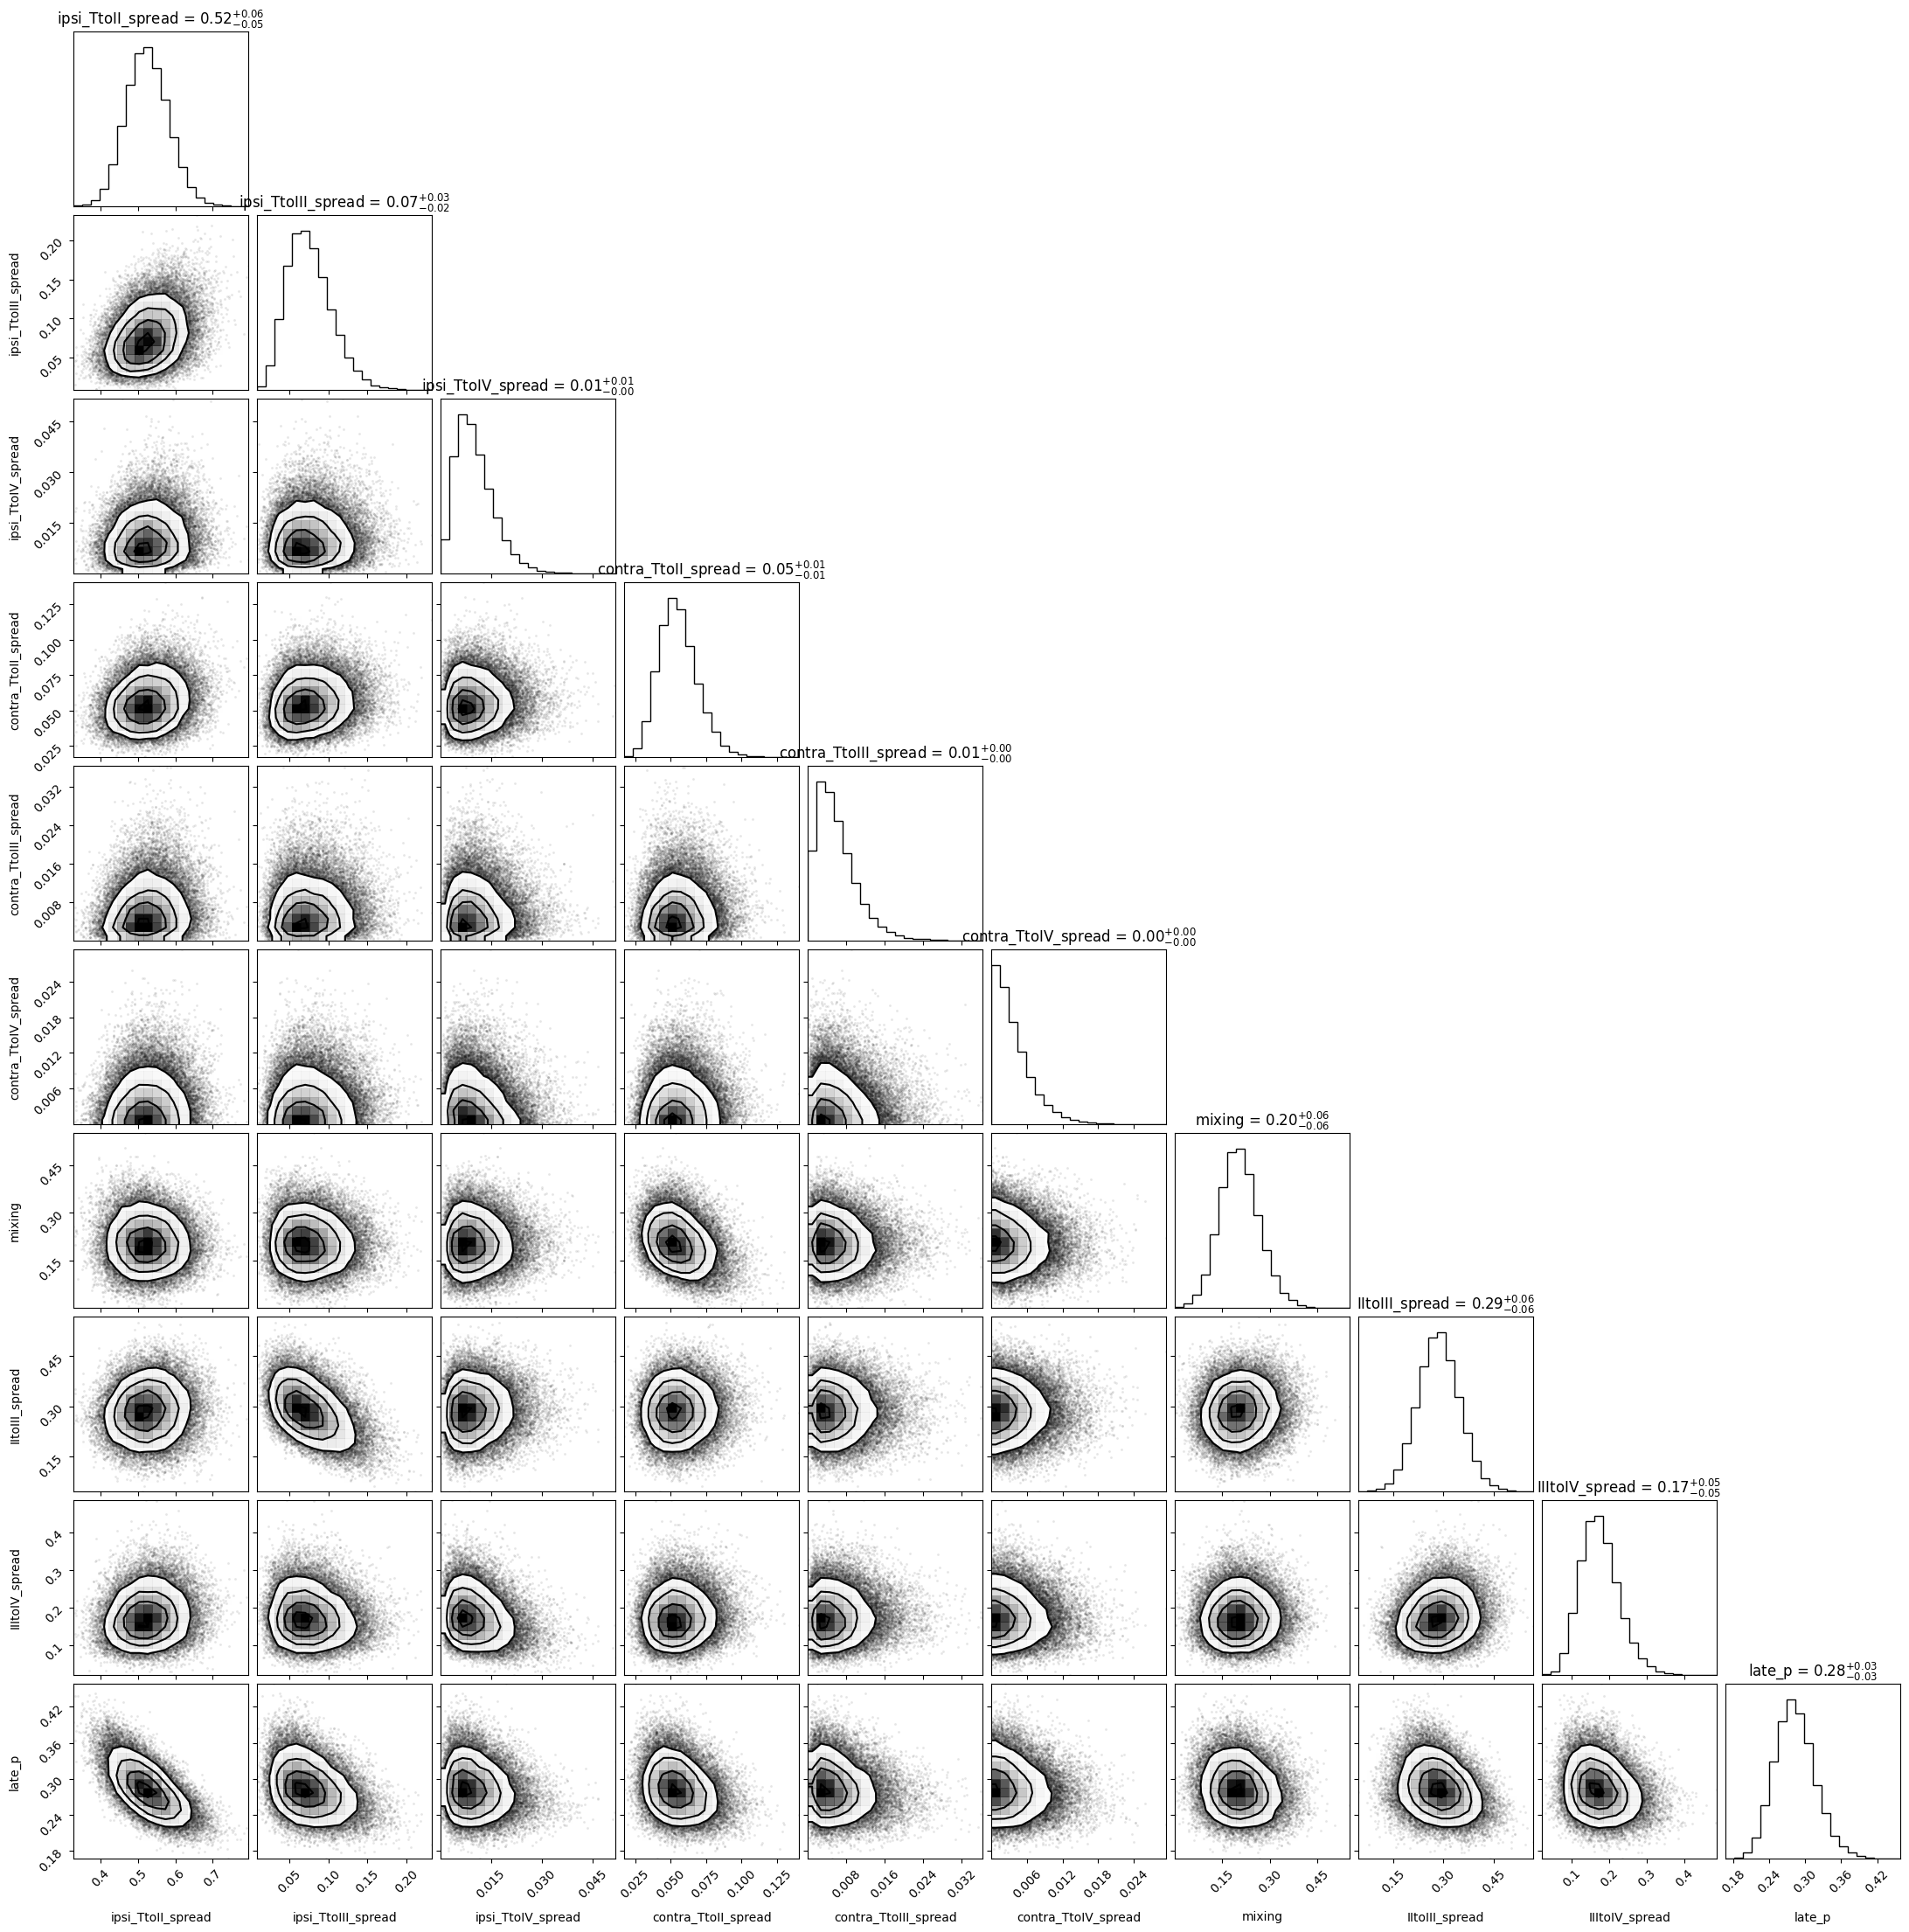

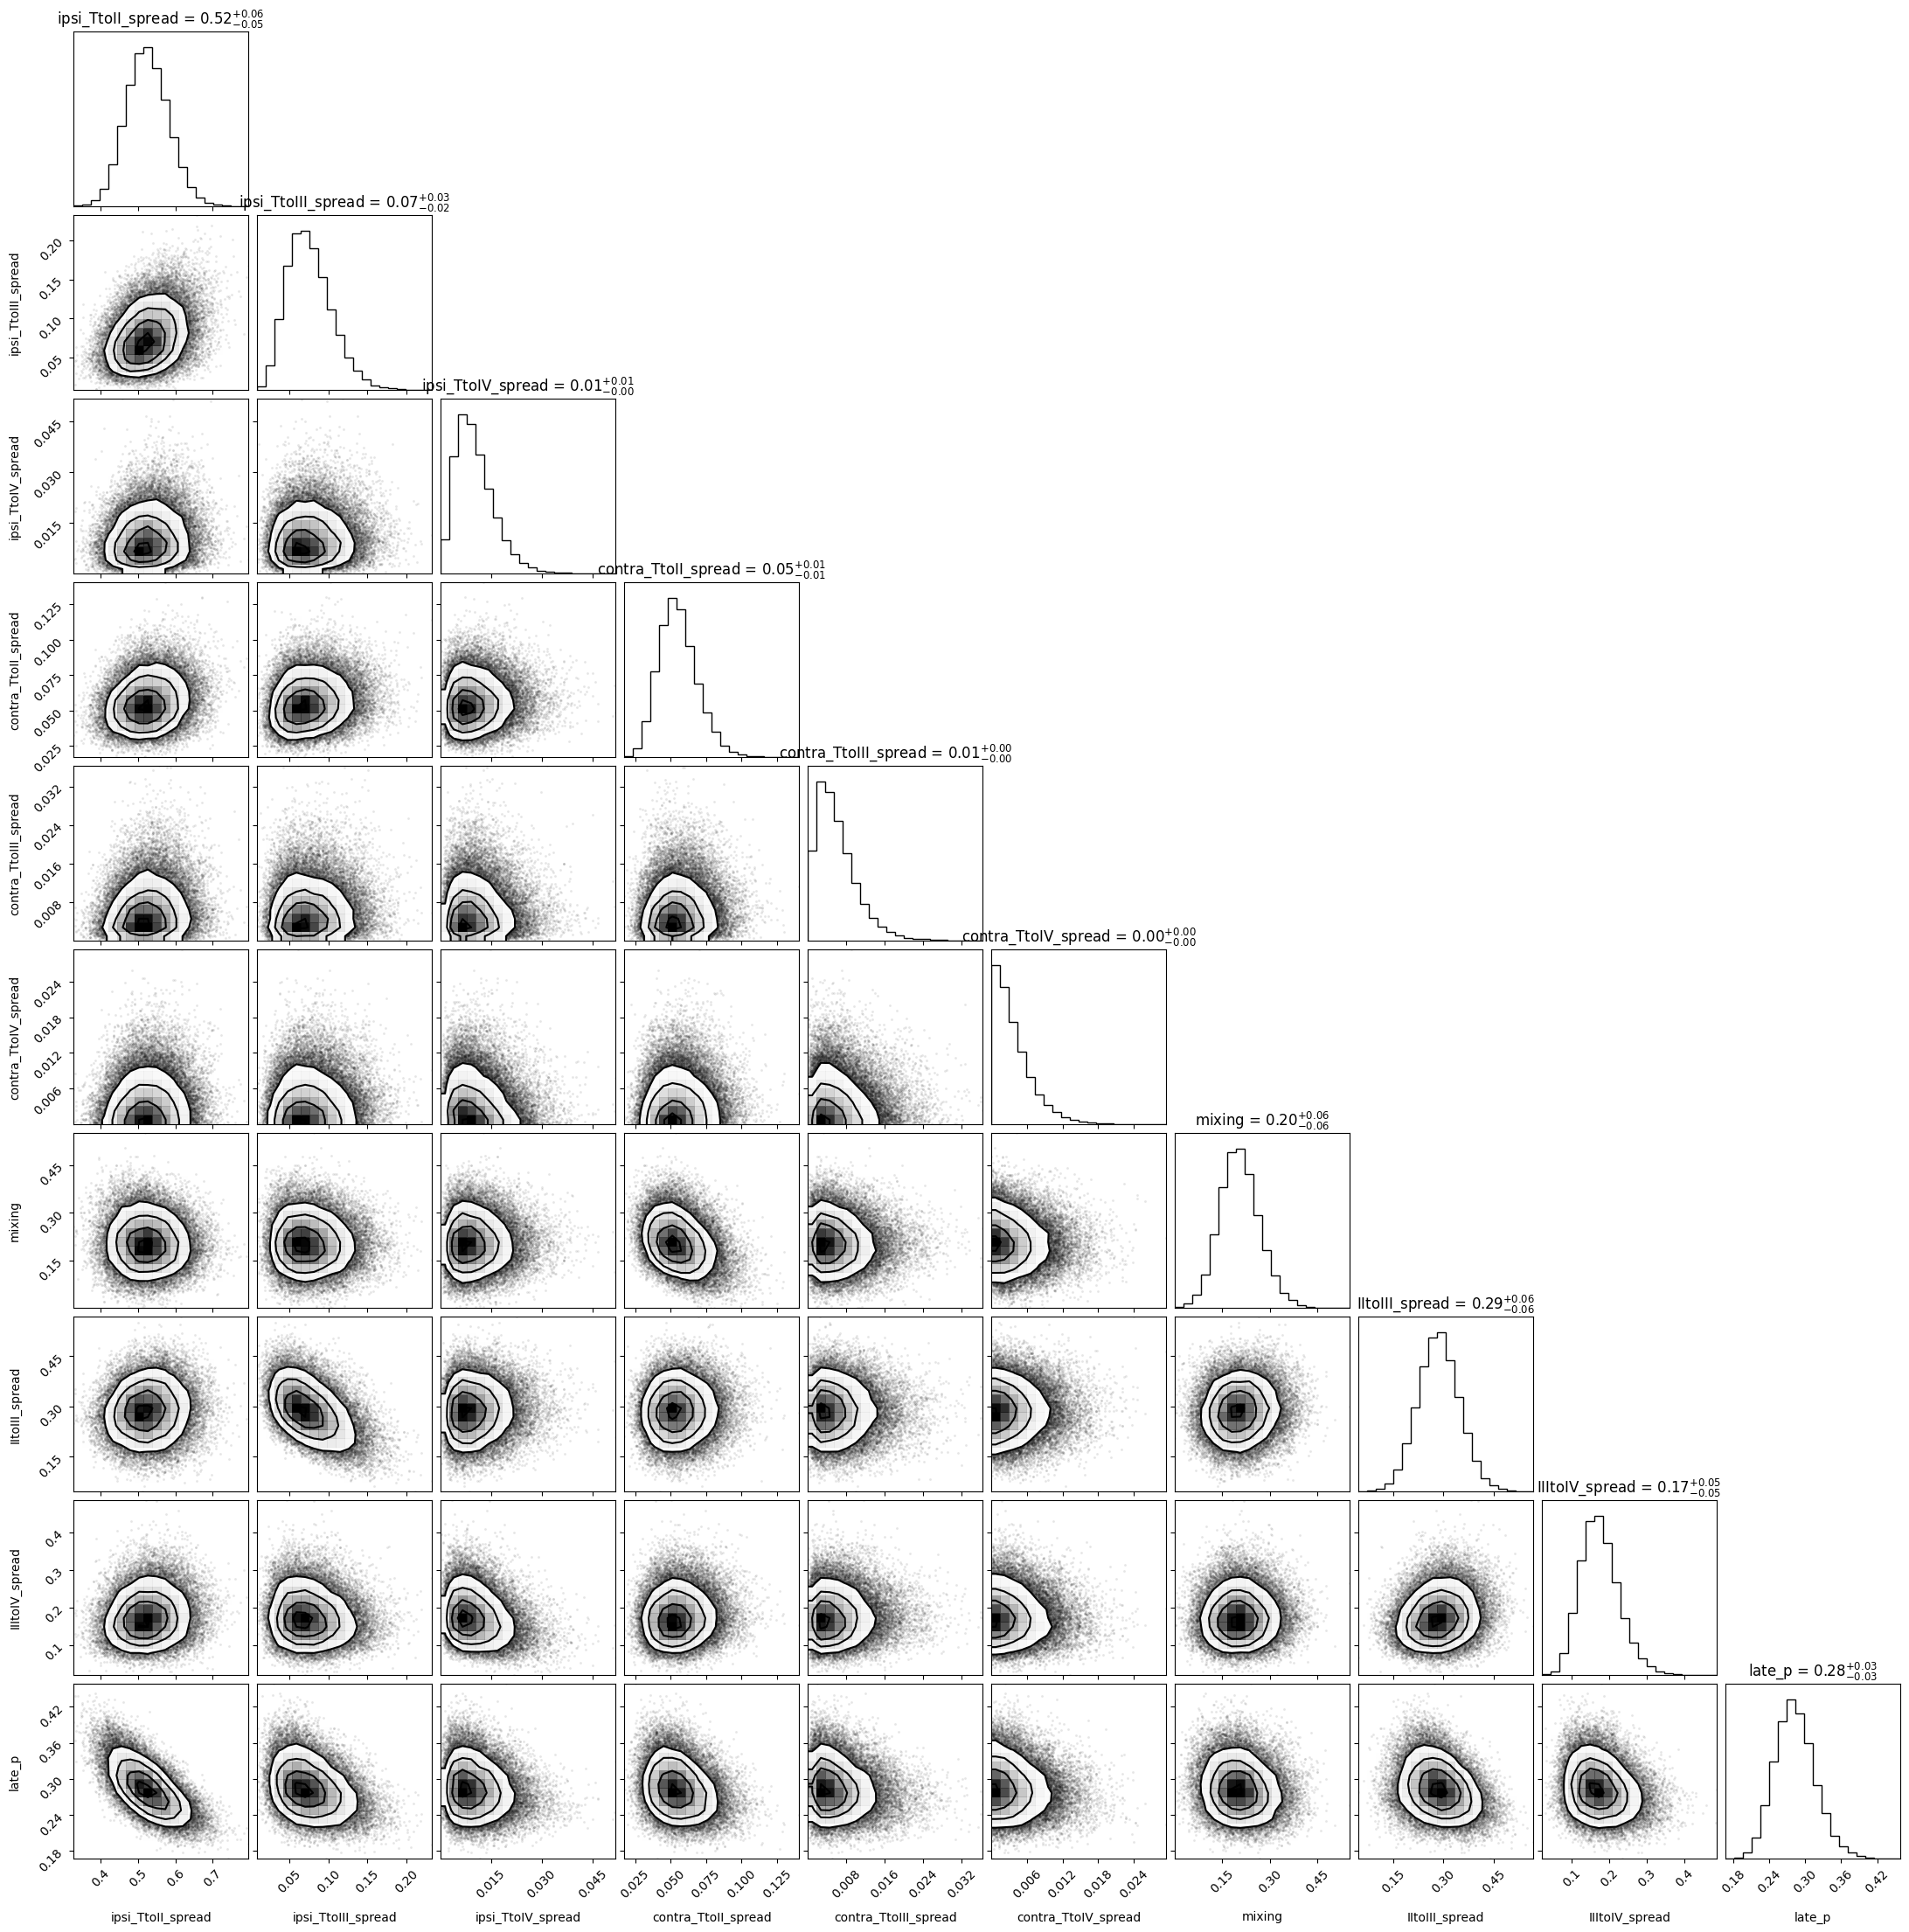

In [70]:
import corner

corner.corner(samples_org_reduced, labels=list(model.get_params().keys()), show_titles=True, )

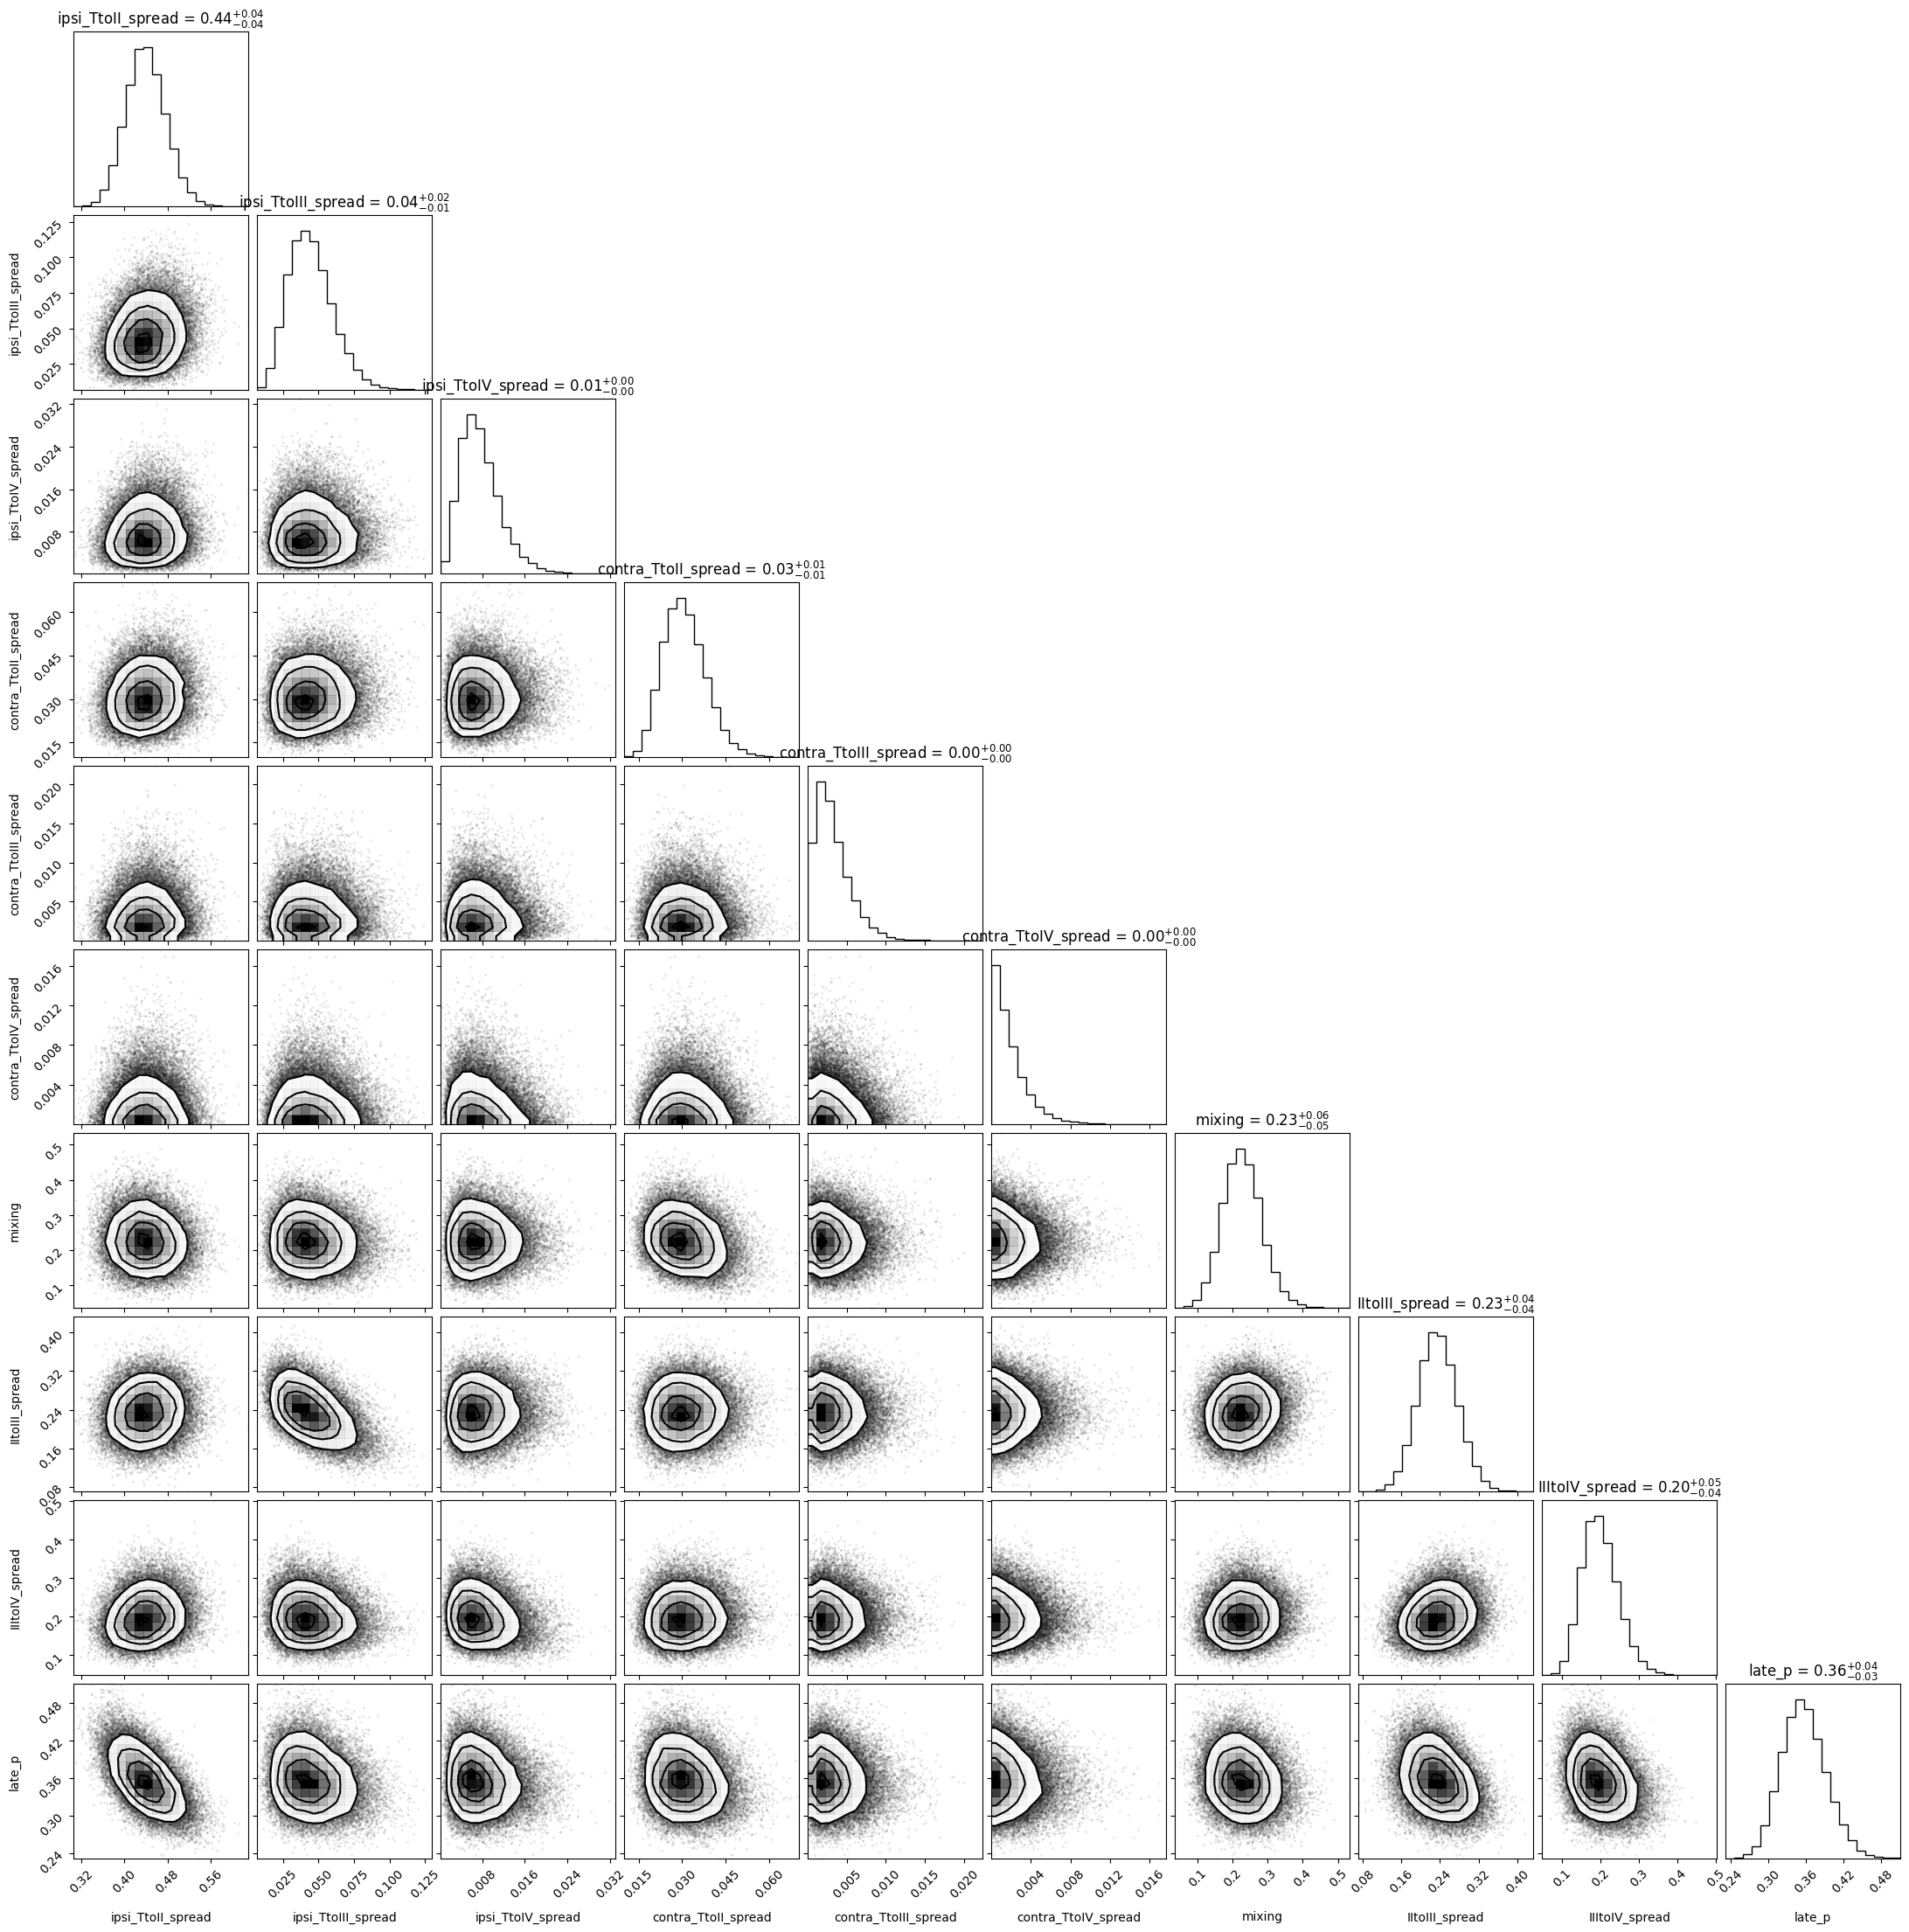

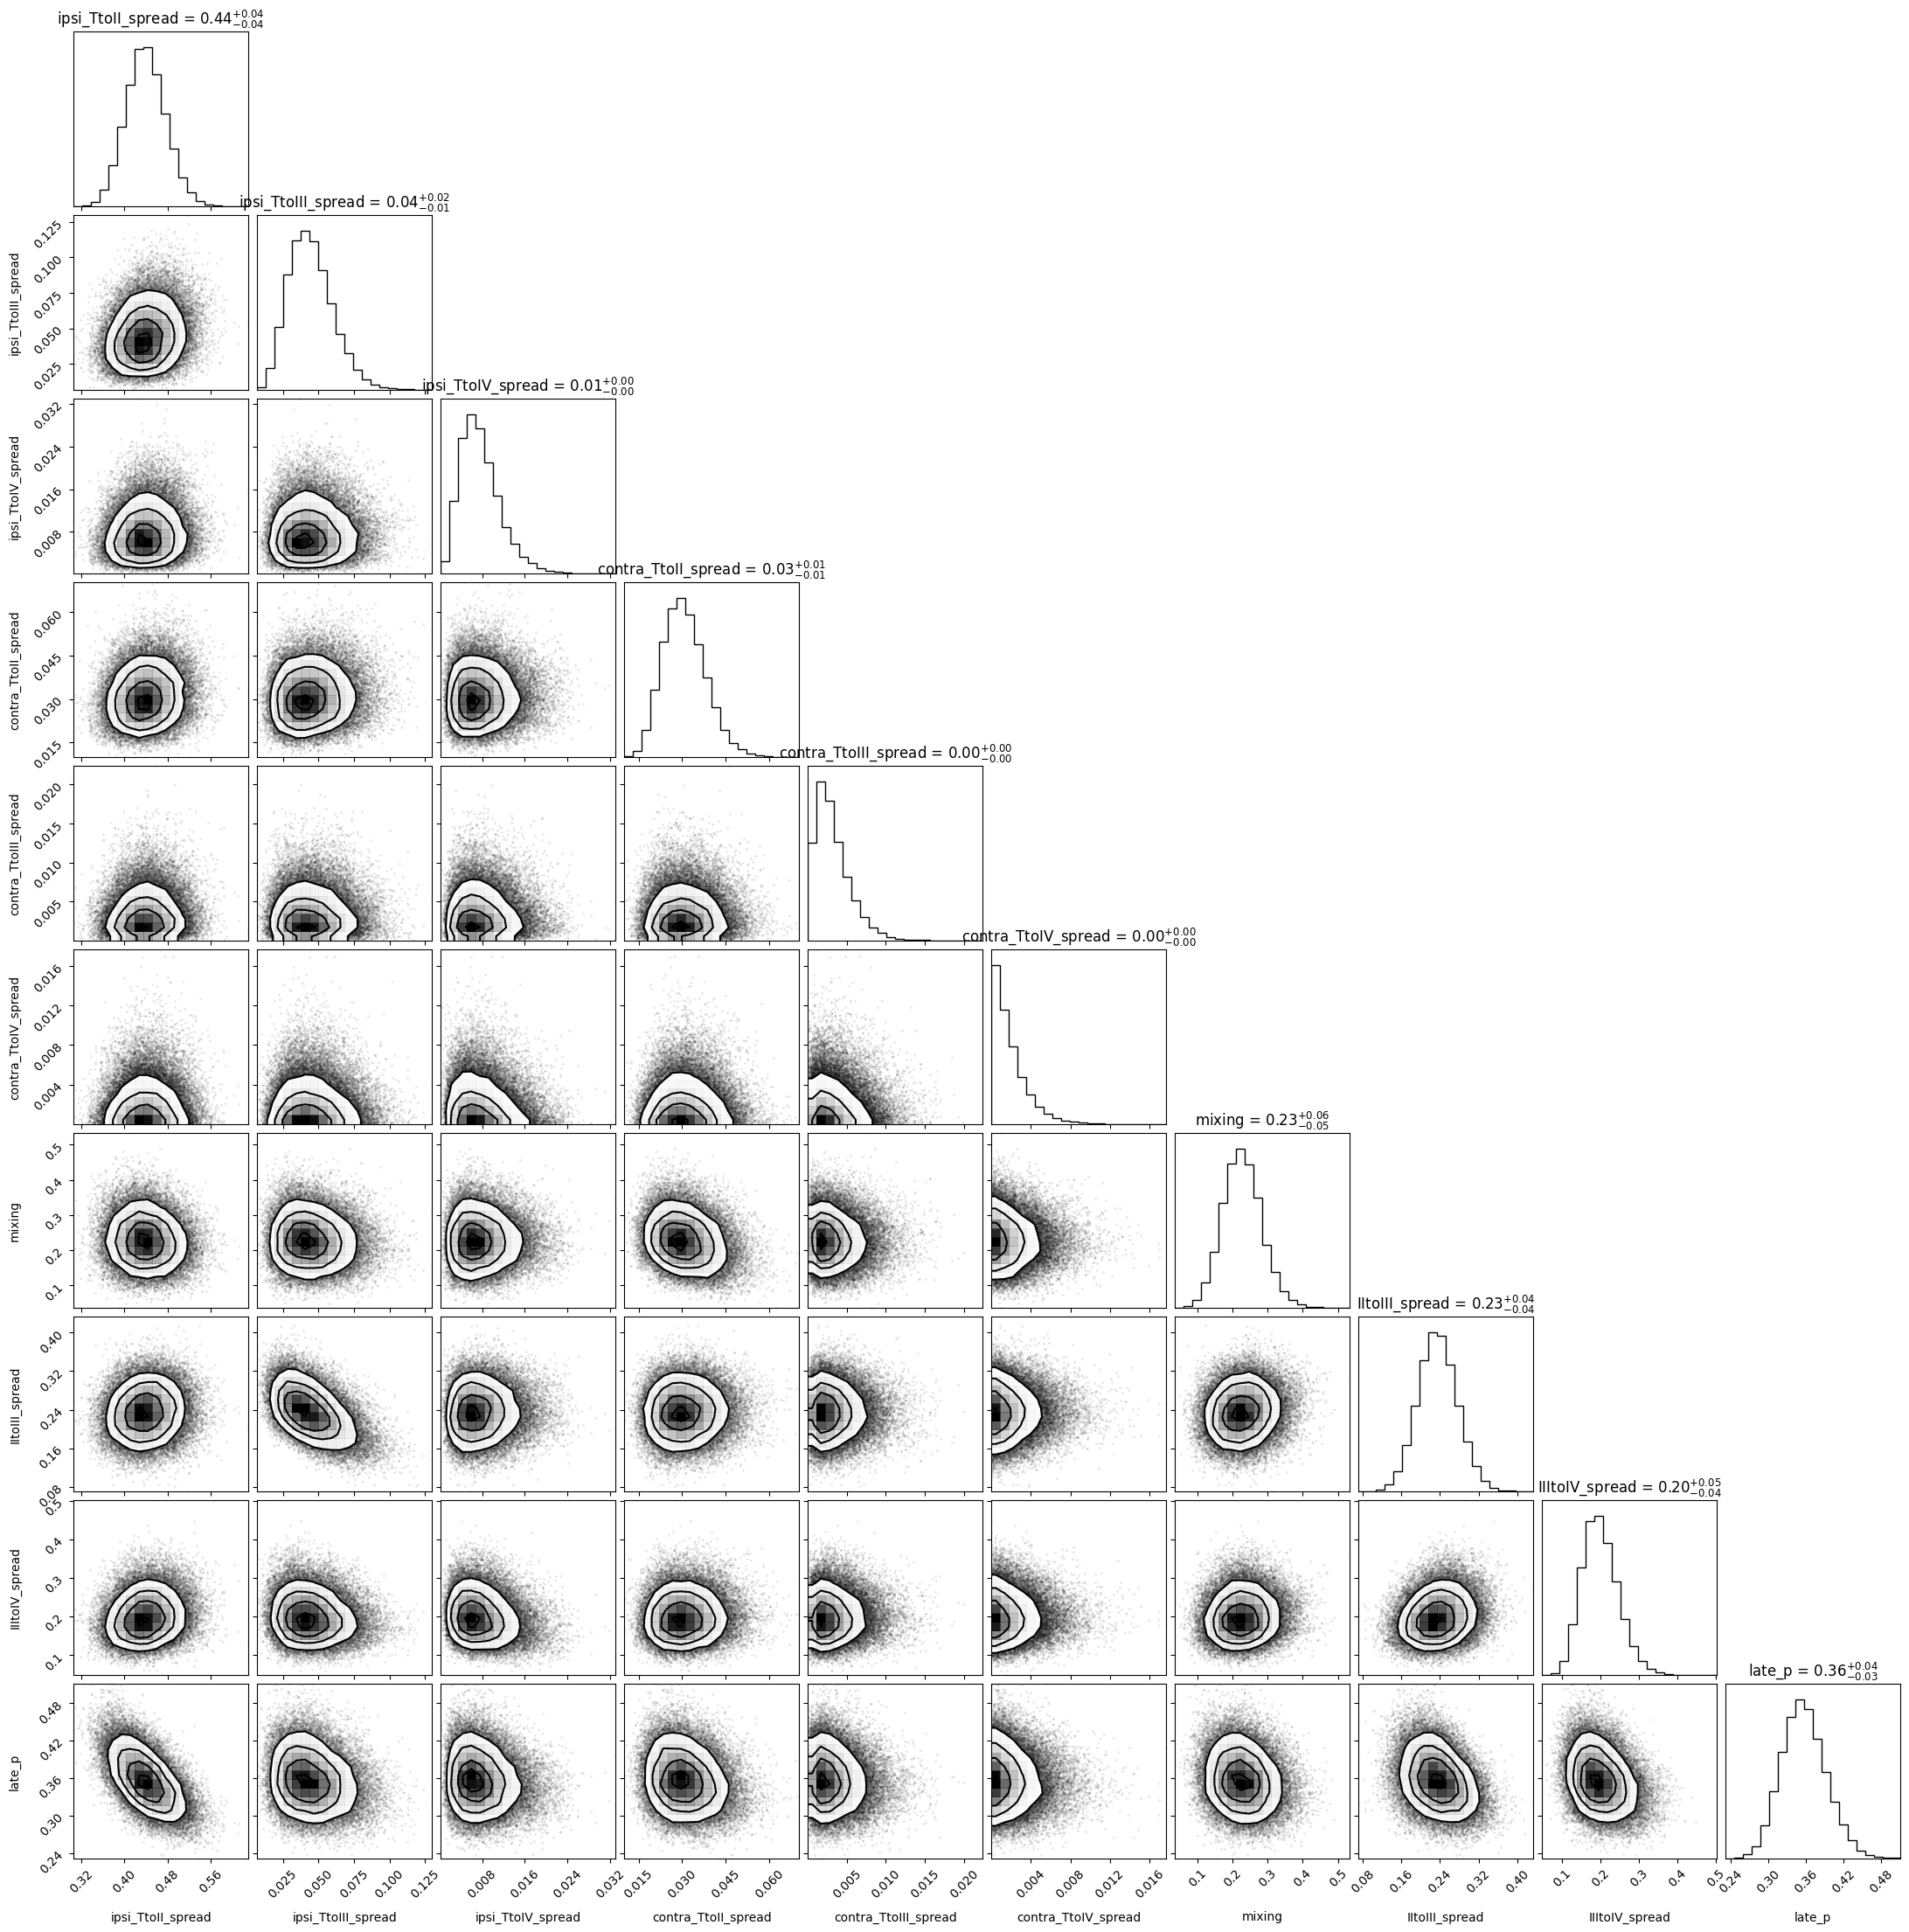

In [42]:
import corner

corner.corner(samples2, labels=list(model.get_params().keys()), show_titles=True, )

In [25]:

param_values = samples2.mean(axis = 0)

params_to_set = {key: value for key, value in zip(list(model.get_params().keys()), param_values)}
model.set_params(**params_to_set)
model.likelihood()

np.float64(-419.0815276020985)

In [ ]:
for_t_stage = None
log = True
from lymph import diagnosis_times, matrix, utils
ipsi_dist_evo = model.ext.ipsi.state_dist_evo()
contra_dist_evo = {}
contra_dist_evo["noext"], contra_dist_evo["ext"] = model.contra_state_dist_evo()
llh = 0.0
t_stages = model.t_stages if for_t_stage is None else [for_t_stage]
for case in ["ext", "noext"]:
    for stage in t_stages:
        diag_time_matrix = np.diag(model.get_distribution(stage).pmf)
        num_states = ipsi_dist_evo.shape[1]
        marg_joint_state_dist = np.zeros(shape=(num_states, num_states))
        # see the `Bilateral` model for why this is done in this way.
        joint_state_dist = (
            ipsi_dist_evo.T @ diag_time_matrix @ contra_dist_evo[case]
        )
        marg_joint_state_dist += joint_state_dist
        _model = getattr(model, case)
        patient_llhs = matrix.fast_trace(
            _model.ipsi.diagnosis_matrix(stage),
            joint_state_dist @ _model.contra.diagnosis_matrix(stage).T,
        )
        print(stage, case)
        llh_former = llh
        llh = utils.add_or_mult(llh, patient_llhs, log=log)
        print(llh - llh_former)

    try:
        marg_patient_llhs = matrix.fast_trace(
            model.unknown.ipsi.diagnosis_matrix(stage),
            marg_joint_state_dist
            @ model.unknown.contra.diagnosis_matrix(stage).T,
        )
        llh = utils.add_or_mult(llh, marg_patient_llhs, log=log)
    except AttributeError:
        # an AttributeError is raised both when the model has no `unknown`
        # attribute and when no data is loaded in the `unknown` model.
        pass

early ext
-89.97614028559369
late ext
-348.4275321863148
early noext
-104.50258376961881
late noext
-45.112965554743596


In [14]:
model.likelihood()

np.float64(-437.8908904313176)

In [232]:
t_stages

['early', 'late']

In [ ]:
llh

np.float64(-588.0192217962709)

In [247]:
model.noext.likelihood()

np.float64(-122.77841424501975)

In [244]:
model.ext.likelihood(t_stage = 'early')

np.float64(-58.98578509491065)

In [15]:
model.ext.likelihood() + model.noext.likelihood()

np.float64(-437.89089043131764)

In [213]:
model.get_params()

{'ipsi_TtoII_spread': np.float64(0.43971048957387443),
 'ipsi_TtoIII_spread': np.float64(0.04522497326748941),
 'ipsi_TtoIV_spread': np.float64(0.007680047368551958),
 'contra_TtoII_spread': np.float64(0.030823549927753175),
 'contra_TtoIII_spread': np.float64(0.003267861317514089),
 'contra_TtoIV_spread': np.float64(0.001939662961325069),
 'mixing': np.float64(0.22726543937154559),
 'IItoIII_spread': np.float64(0.23526371825802853),
 'IIItoIV_spread': np.float64(0.19967371675566617),
 'late_p': 0.5,
 'midext_prob': np.float64(0.3559333304483964)}

In [208]:
model.ext.contra.patient_data['_model']['#']['t_stage'].value_counts()

t_stage
late     104
early     30
Name: count, dtype: int64